For this assignment, you will learn how to use and tune a common gradient boosted tree package XGBoost:


https://xgboost.readthedocs.io/en/latest/


If there is another library you are familiar with, feel free to use that. Do not use Sci-kit.


First, select one of the datasets from section 10.14 of the test(either California Housing or New Zealand Fish) and replicate the analysis, including the plots. You don't have to do the maps. 


Next, select a dataset of your choice and perform a similar analysis. You can perform classification or regression, your choice. This should be a more complicated, and if you want, messier, dataset than the ones we've looked at so far. Use the built-in functions that come with the xgboost package to tune the model and optimize your performance, and determine the feature importance.  As this assignment is more focused on using a library, I will be expecting a more thoughtful analysis of the results. Specifically, you are to discuss the feature importance metrics. Do they make sense? Are there any features that are non-intuitive that might have


For some more details on XGBoost, you can have a look at : https://arxiv.org/pdf/1603.02754v3.pdf and https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5



Stretch goal, up to 5 points. Go deeper into feature importance, use the Shapley library:

https://shap.readthedocs.io/en/latest/overviews.html

And do an additional feature importance analysis using this library. You can use XGBoost and/or other algorithms. Compare the results to the XGBoost results. Up to 5 points stretch goal points awarded based on how thorough your analysis is, and how well written your results are.

In [1]:
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import shap
shap.initjs()


In [2]:
data, target = shap.datasets.california()

# California Housing 

In [3]:
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = XGBRegressor()

model.fit(X_train, y_train, verbose=False)
# california_housing.columns

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [5]:
predictions = model.predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.30957335413783094


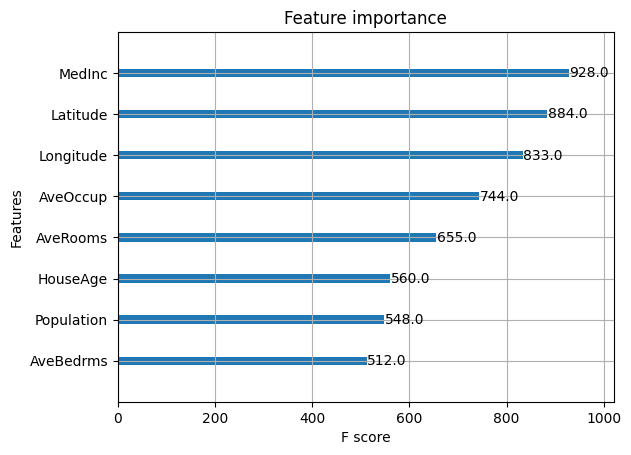

In [6]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

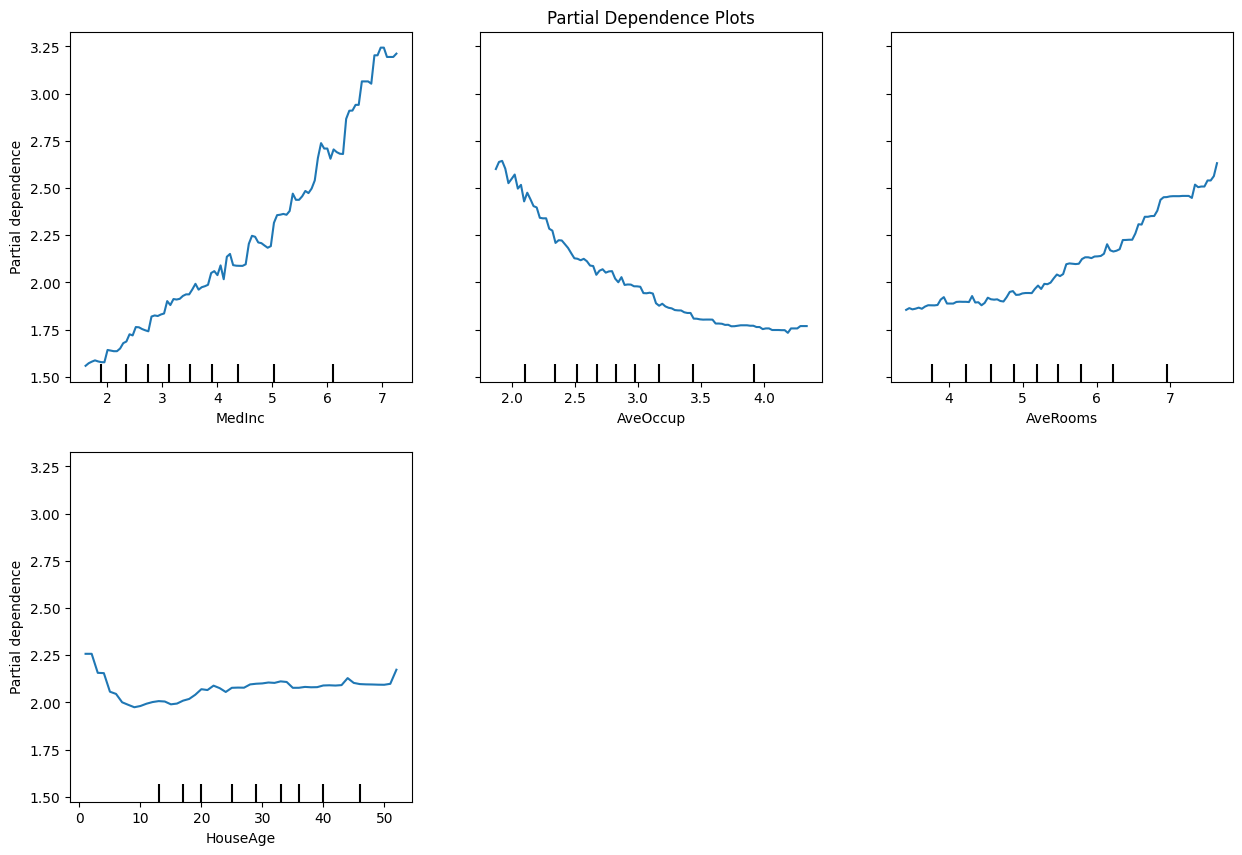

In [7]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features=(0, 5, 2, 1), # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

# Adult Census: Binary Classification

The original data includes the following columns:

- Age (float) : Age in years. 
- Workclass (category) : Type of employment. 
- fnlwgt (float) : Final weight; the number of units in the target population that the - record represents. 
- Education (category) : Highest level of education achieved. 
- Education-Num (float) : Numeric representation of education level. 
- Marital Status (category) : Marital status of the individual. 
- Occupation (category) : Type of occupation. 
- Relationship (category) : Relationship status.
- Race (category) : Ethnicity of the individual.
- Sex (category) : Gender of the individual.
- Capital Gain (float) : Capital gains recorded.
- Capital Loss (float) : Capital losses recorded.
- Hours per week (float) : Number of hours worked per week.
- Country (category) : Country of origin.
- **Target (category) : Binary target variable indicating whether the individual earns more than 50K.**

The Education’ column is redundant with ‘Education-Num’ and is dropped for simplicity.
The ‘Target’ column is converted to binary (True/False) where ‘>50K’ is True and ‘<=50K’ is False.

In [8]:
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
data, target = shap.datasets.adult()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [10]:
model = XGBClassifier()

model.fit(X_train, y_train, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
predictions = model.predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.12467372946414862


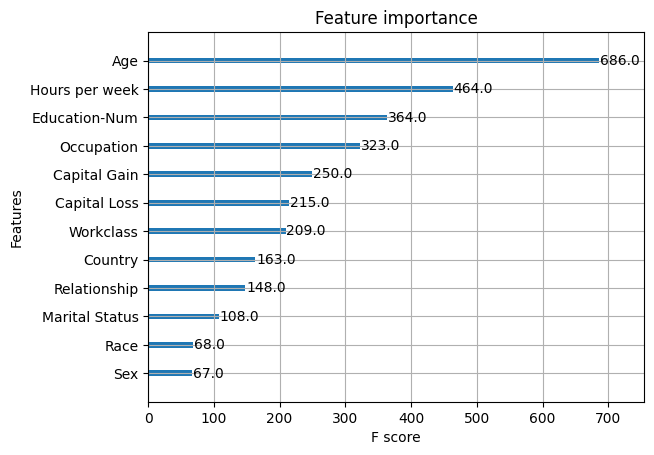

In [12]:
plot_importance(model)
plt.show()

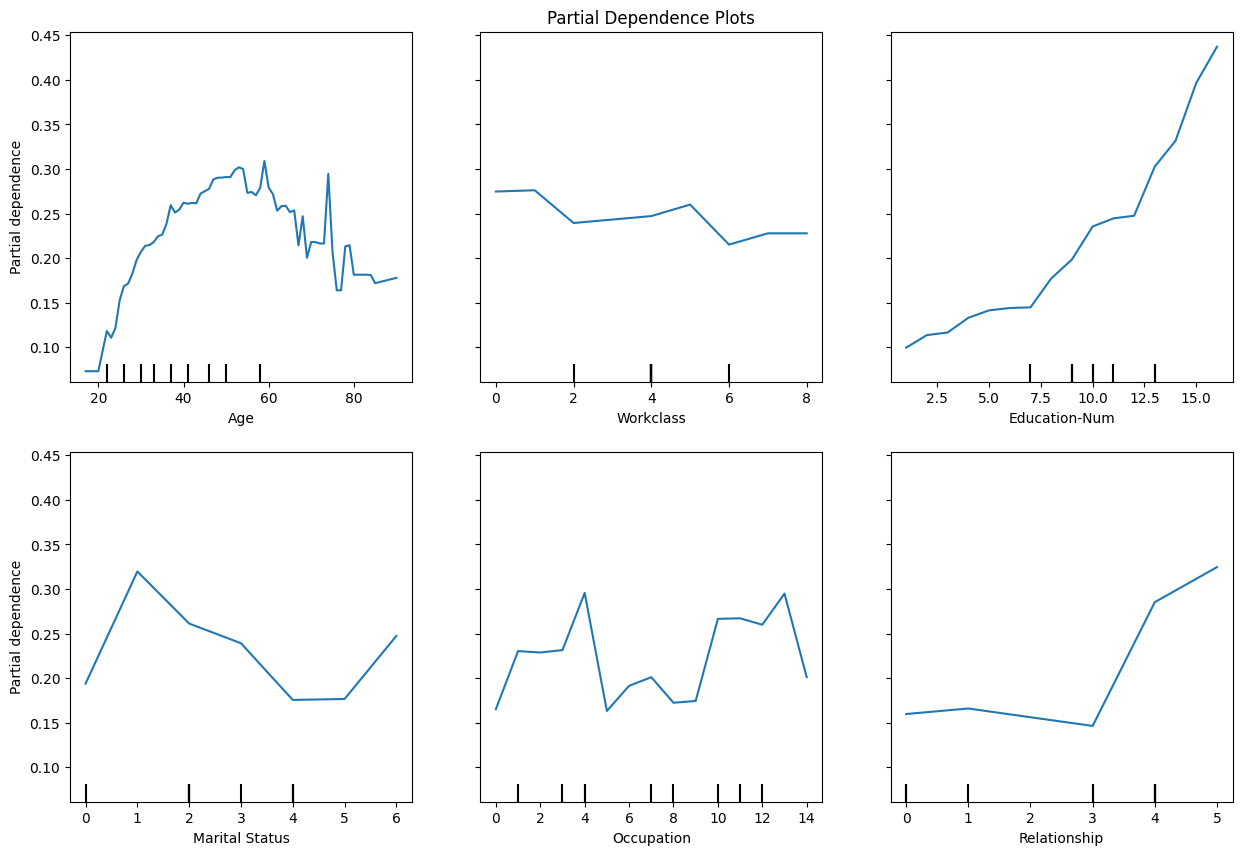

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_test,
    features=(0,1,2,3,4,5), # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

## Extra SHAP Feature Importance Analysis (Bonus)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)
X_display, y_display = shap.datasets.adult(display=True)

SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output. 

The first plot shows the mean importance of the SHAP value magnitudes across the dataset. Here we see that relationship has a greater model impact compared to age, which contradicts what xgboost spit out for feature importance.

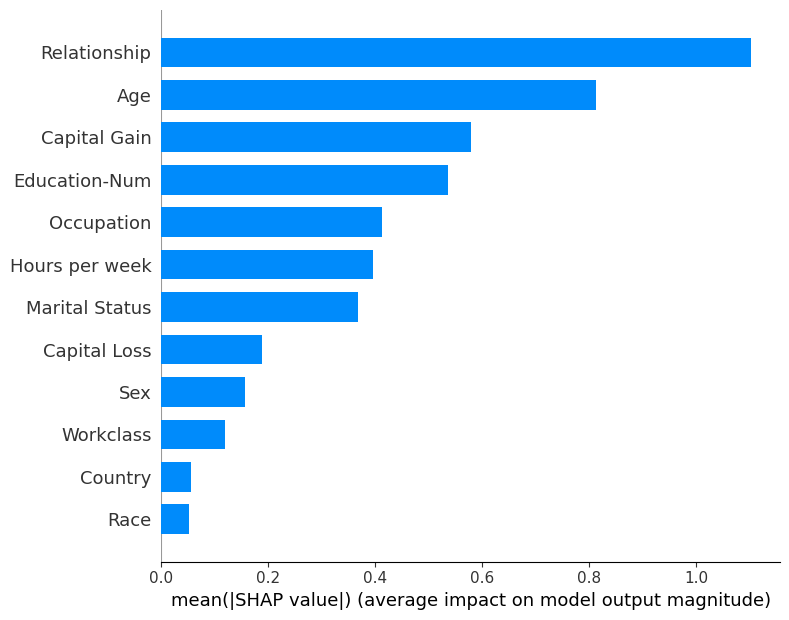

In [ ]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

 Rather than using a typical feature importance bar chart, we will use a density scatter plot (also known as a beeswarm plot) of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 
 
 In a beeswarm plot, for each variable, every instance of the dataset appears as its own point. In places where there is a high densit of SHAP values, the points are stacked vertically. The color represents the actual value of each feature, not the SHAP value.

 It is interesting to note that the relationship feature has more total model impact than the captial gain feature (in last plot), but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount. When the scatter points don’t fit on a line, they pile up to show density, and the color of each point represents the feature value of that individual prediction.

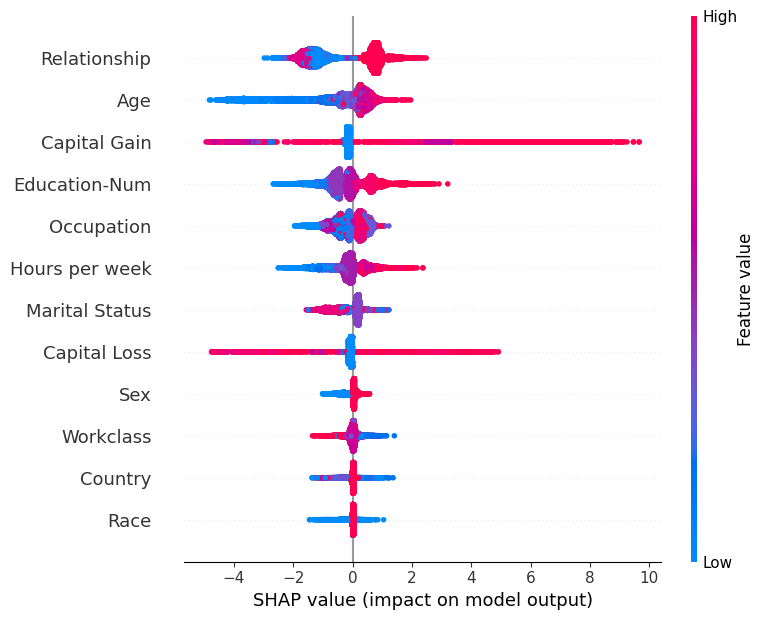

In [16]:
shap.summary_plot(shap_values, data)